In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input\\results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['damage'], axis=1), df['damage'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
%%time
model = RandomForestRegressor(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 32.9 s
Wall time: 6.21 s


<h3>Components from PCA</h3>

In [6]:
pca.n_components_

21

<h3>MAPE</h3>

In [7]:
mean_absolute_percentage_error(y_test, pred)

0.11743226880411468

<h3>R2</h3>

In [8]:
r2_score(y_test, pred)

0.9915733041822887

<h3>Cosine Similarity</h3>

In [9]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

0.9989650586077369


<h3>Visualization</h3>

In [10]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg_pca.csv', index=False)

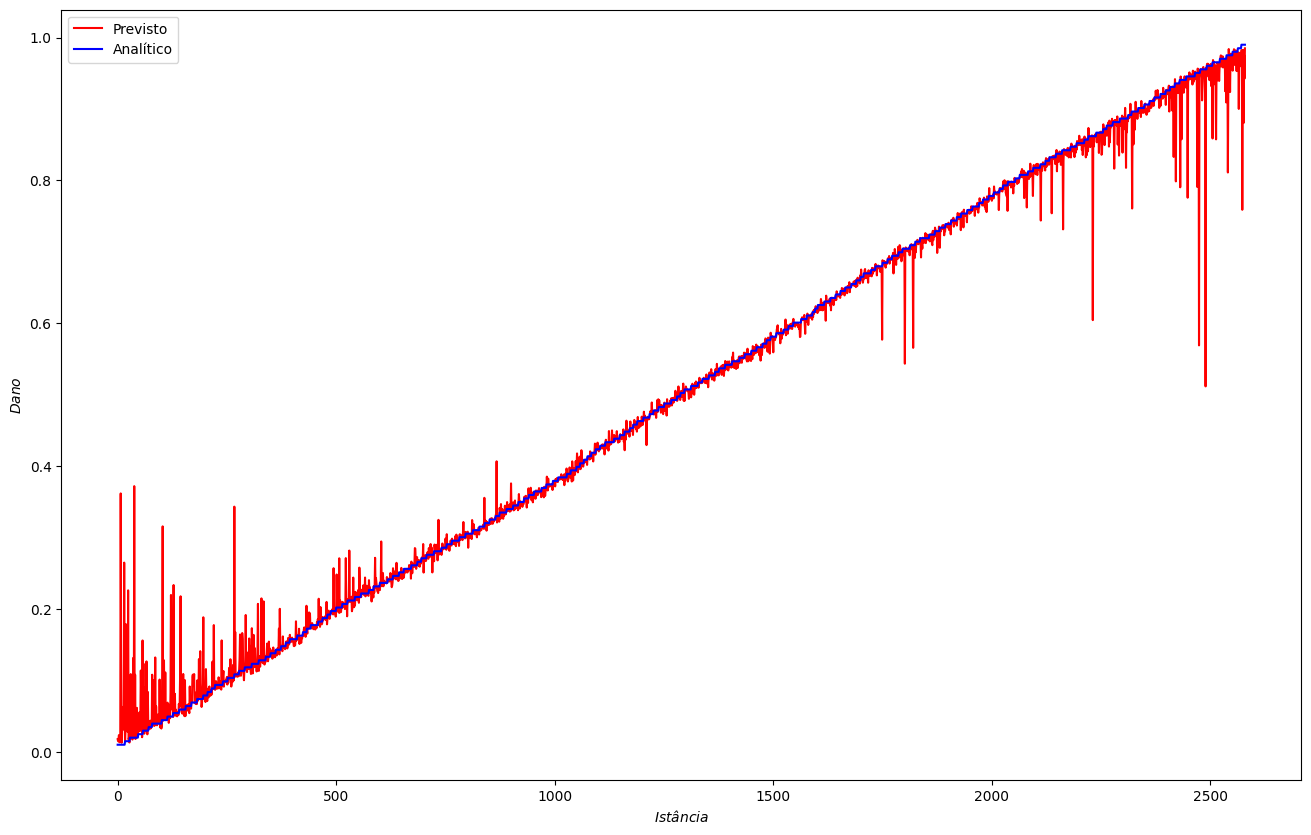

In [11]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Exponential Damage</h1>

In [12]:
df_exp = pd.read_csv('input\\results_complete_exponential.csv')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['damage'], test_size=0.10, random_state=41)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [15]:
%%time
model = RandomForestRegressor(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 30.1 s
Wall time: 5.66 s


<h3>Components from PCA</h3>

In [16]:
pca.n_components_

19

<h3>MAPE</h3>

In [17]:
mean_absolute_percentage_error(y_test, pred)

0.08825291803643145

<h3>R2</h3>

In [18]:
r2_score(y_test, pred)

0.9877098034450028

<h3>Cosine Similarity</h3>

In [19]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

0.9991304382555997


<h3>Visualization</h3>

In [20]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_exp_reg_pca.csv', index=False)

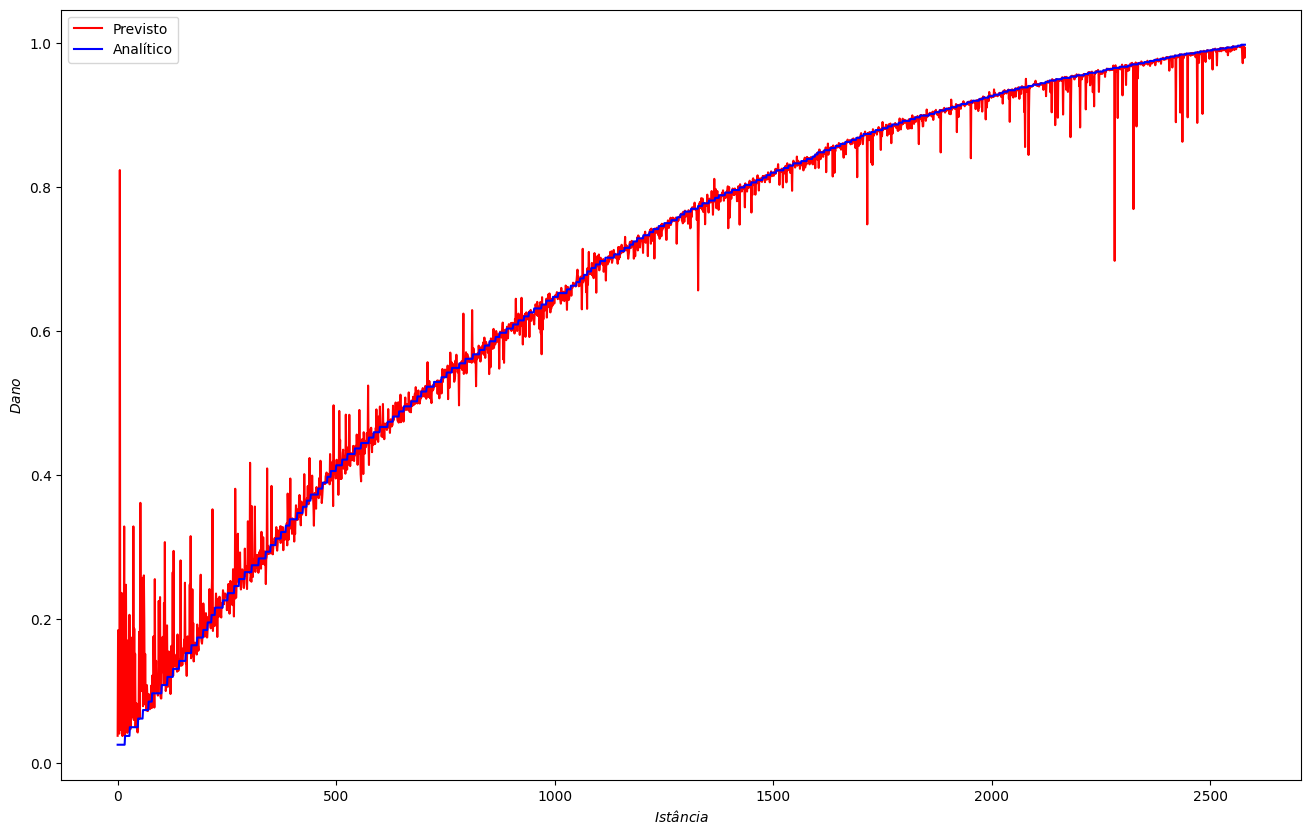

In [21]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Sigmoid-like Damage</h1>

In [22]:
df_sig = pd.read_csv('input\\results_complete_sigmoid_like.csv')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['damage'], test_size=0.10, random_state=41)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
%%time
model = RandomForestRegressor(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 26.3 s
Wall time: 4.89 s


<h3>Components from PCA</h3>

In [26]:
pca.n_components_

14

<h3>MAPE</h3>

In [27]:
mean_absolute_percentage_error(y_test, pred)

1.4772684437441876

<h3>R2</h3>

In [28]:
r2_score(y_test, pred)

0.9424491364734594

<h3>Cosine Similarity</h3>

In [29]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

0.9895396136274522


<h3>Visualization</h3>

In [30]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_sig_reg_pca.csv', index=False)

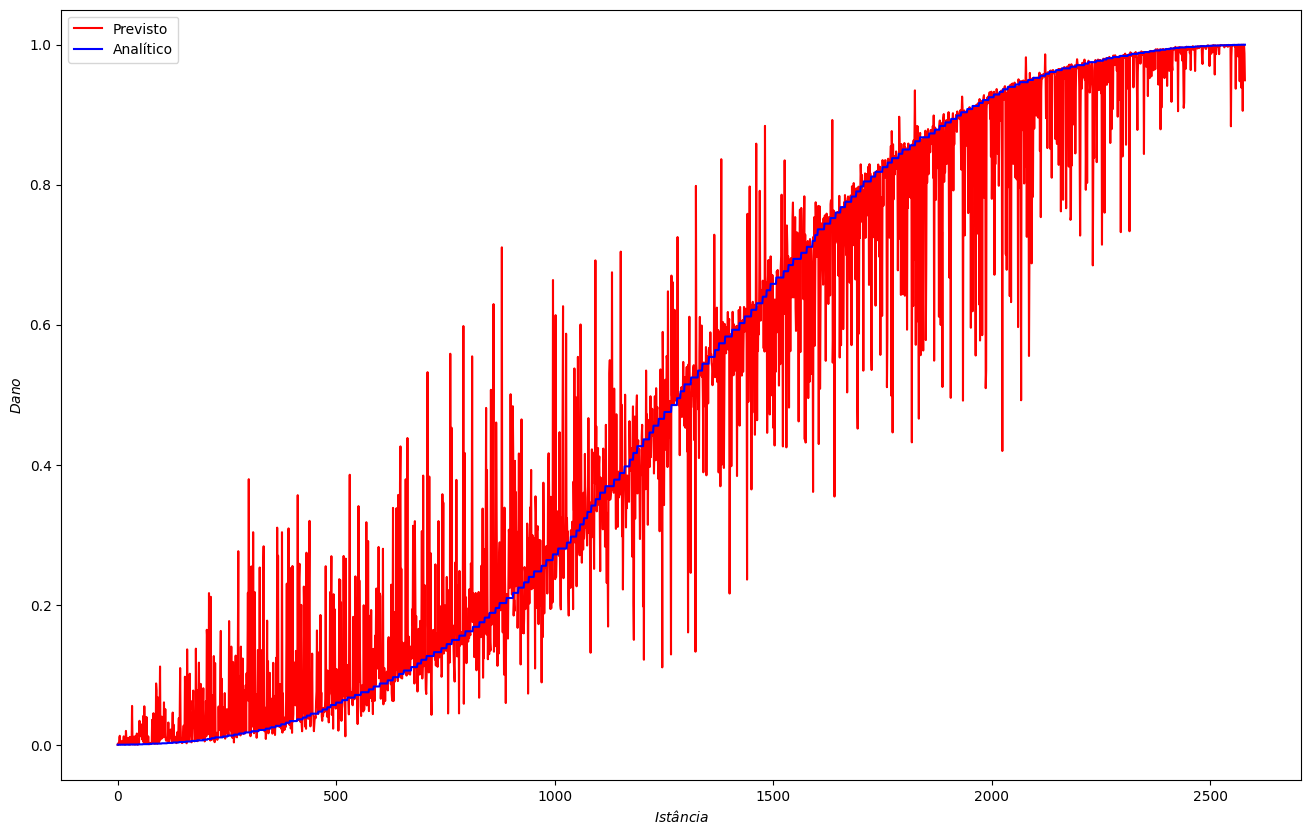

In [31]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()